# EMEPy Subpixel Techniques

### Circular Waveguide Radius Sweep

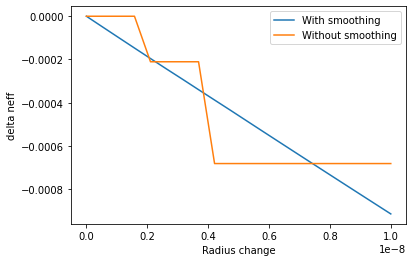

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from emepy.tools import circle_to_n
from emepy.fd import MSEMpy

def run(radius=1e-6, subpixel=True, mesh=50):
    x = np.linspace(-1.25e-6, 1.25e-6, mesh)
    y = np.linspace(-1.25e-6, 1.25e-6, mesh)
    n = circle_to_n(
            (0, 0),
            radius,
            x,
            y,
            subpixel,
            3.4,
            1.4,
        )
    xx = ((x)[1:] + (x)[:-1]) / 2
    yy = ((y)[1:] + (y)[:-1]) / 2
    ms = MSEMpy(wl=1.55e-6, n=n, x=xx, y=yy, num_modes=1)
    ms.solve()
    return ms.get_mode()


with_smoothing = []
without_smoothing = []
alt = np.linspace(0, 1e-8, 20)

for i, d in enumerate(alt):
    mode1 = run(1e-6, True)
    mode2 = run(1e-6 + d, True)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    with_smoothing.append(np.real(mode1.neff - mode2.neff))

    mode1 = run(1e-6, False)
    mode2 = run(1e-6 + d, False)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    without_smoothing.append(np.real(mode1.neff - mode2.neff))

plt.figure()
plt.plot(alt, with_smoothing, label="With smoothing")
plt.plot(alt, without_smoothing, label="Without smoothing")
plt.xlabel("Radius change")
plt.ylabel("delta neff")
plt.legend()
plt.show()

### Rectangular waveguide width sweep

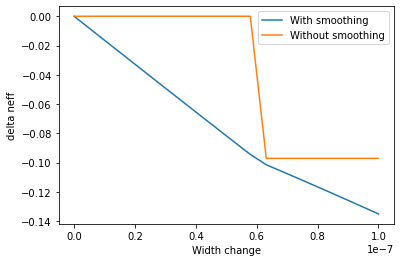

In [6]:
import numpy as np
from matplotlib import pyplot as plt
from emepy.tools import rectangle_to_n
from emepy.fd import MSEMpy

def run(width=0.5e-6, subpixel=True, mesh=50):
    x = np.linspace(-1.25e-6, 1.25e-6, mesh)
    y = np.linspace(-1.25e-6, 1.25e-6, mesh)
    n = rectangle_to_n(
            (0,0),
            width,
            0.22e-6,
            x,
            y,
            subpixel,
            3.4,
            1.4,
        )
    xx = ((x)[1:] + (x)[:-1]) / 2
    yy = ((y)[1:] + (y)[:-1]) / 2
    ms = MSEMpy(wl=1.55e-6, n=n, x=xx, y=yy, num_modes=1)
    ms.solve()
    return ms.get_mode()


with_smoothing = []
without_smoothing = []
alt = np.linspace(0, 1e-7, 20)

for i, d in enumerate(alt):
    mode1 = run(0.5e-6, True)
    mode2 = run(0.5e-6 + d, True)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    with_smoothing.append(np.real(mode1.neff - mode2.neff))

    mode1 = run(0.5e-6, False)
    mode2 = run(0.5e-6 + d, False)
    mode3 = mode1 - mode2
    mode3.n = mode2.n - mode1.n
    without_smoothing.append(np.real(mode1.neff - mode2.neff))

plt.figure()
plt.plot(alt, with_smoothing, label="With smoothing")
plt.plot(alt, without_smoothing, label="Without smoothing")
plt.xlabel("Width change")
plt.ylabel("delta neff")
plt.legend()
plt.show()